In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1','v2']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.columns = ['label','text']

### Preprocessing

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [8]:
lemm = WordNetLemmatizer()

In [9]:
def cleaned_text(text):
    text = text.lower()
    text = ''.join([i for i in text if i not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [i for i in tokens if i.isalpha()]
    final_text = [lemm.lemmatize(i,pos='v') for i in tokens if i not in stopwords.words('english')]

    return ' '.join(final_text)

In [10]:
df['text'] = df['text'].apply(cleaned_text)

### Visualising words

In [11]:
spam = df[df['label'] == 'spam']

In [12]:
all_text = ' '.join(spam['text'].astype(str))

In [13]:
from wordcloud import WordCloud

In [14]:
words = WordCloud(width=800, height=400, background_color='white').generate(all_text)

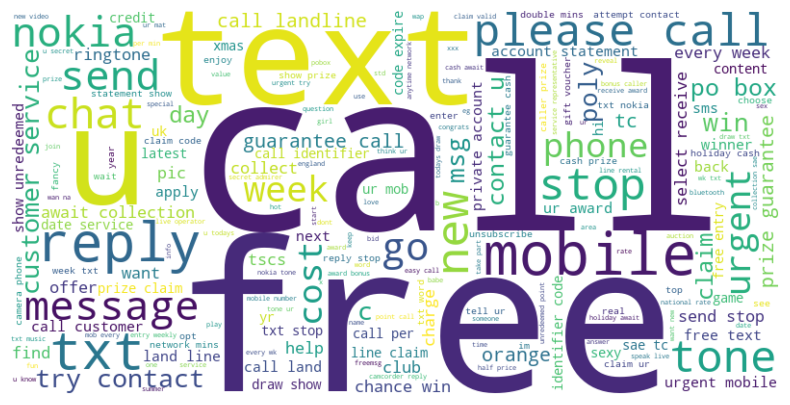

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
ham = df[df['label'] == 'ham']

In [17]:
all_text2 = ' '.join(ham['text'].astype(str))

In [18]:
words2 = WordCloud(width=800, height=400, background_color='white').generate(all_text2)

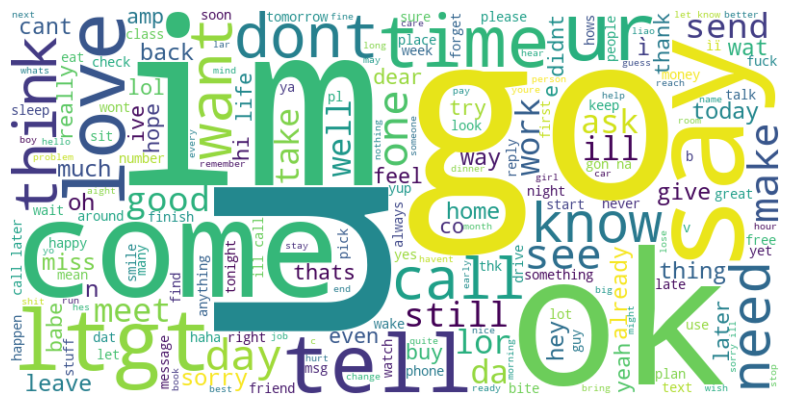

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(words2, interpolation='bilinear')
plt.axis('off')
plt.show()

### Vectorization and Encoding

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [21]:
vectorizer = TfidfVectorizer()
le = LabelEncoder()

In [22]:
y = le.fit_transform(df['label'])

In [23]:
x = vectorizer.fit_transform(df['text']).toarray()

### Building the Models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [27]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### GNB

In [28]:
gnb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [29]:
gnb.score(x_train,y_train),gnb.score(x_test,y_test)

(0.9344850796499888, 0.8582959641255605)

Accuracy GNB: 0.8582959641255605
Precision GNB: 0.48507462686567165
Recall GNB: 0.8666666666666667


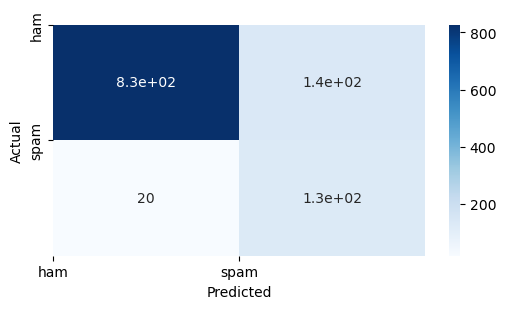

In [30]:
y_pred = gnb.predict(x_test)
print(f'Accuracy GNB: {accuracy_score(y_test,y_pred)}')
print(f'Precision GNB: {precision_score(y_test,y_pred)}')
print(f'Recall GNB: {recall_score(y_test,y_pred)}')

plt.figure(figsize =(6,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot =True,cmap ='Blues')
plt.xticks(ticks = [0,1],labels = ['ham','spam'])
plt.xlabel('Predicted')
plt.yticks(ticks = [0,1],labels = ['ham','spam'])
plt.ylabel('Actual')
plt.show()

#### MNB

In [31]:
mnb.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [32]:
mnb.score(x_train,y_train),mnb.score(x_test,y_test)

(0.9699349338119811, 0.9623318385650225)

Accuracy MNB: 0.9623318385650225
Precision MNB: 0.990909090909091
Recall MNB: 0.7266666666666667


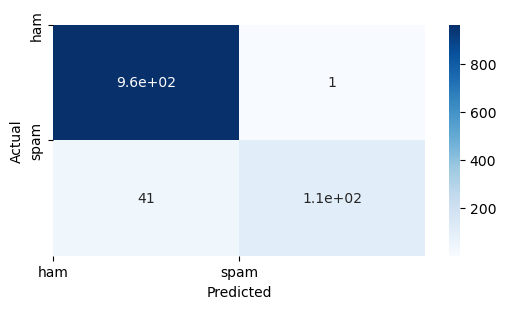

In [33]:
y_pred2 = mnb.predict(x_test)
print(f'Accuracy MNB: {accuracy_score(y_test,y_pred2)}')
print(f'Precision MNB: {precision_score(y_test,y_pred2)}')
print(f'Recall MNB: {recall_score(y_test,y_pred2)}')

plt.figure(figsize =(6,3))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot =True,cmap ='Blues')
plt.xticks(ticks = [0,1],labels = ['ham','spam'])
plt.xlabel('Predicted')
plt.yticks(ticks = [0,1],labels = ['ham','spam'])
plt.ylabel('Actual')
plt.show()

#### BNB

In [34]:
bnb.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [35]:
bnb.score(x_train,y_train),bnb.score(x_test,y_test)

(0.9771146511106125, 0.9650224215246637)

Accuracy BNB: 0.9623318385650225
Precision BNB: 0.990909090909091
Recall BNB: 0.7266666666666667


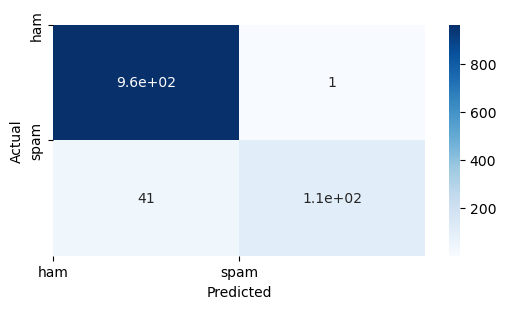

In [36]:
y_pred3 = mnb.predict(x_test)
print(f'Accuracy BNB: {accuracy_score(y_test,y_pred3)}')
print(f'Precision BNB: {precision_score(y_test,y_pred3)}')
print(f'Recall BNB: {recall_score(y_test,y_pred3)}')

plt.figure(figsize =(6,3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot =True,cmap ='Blues')
plt.xticks(ticks = [0,1],labels = ['ham','spam'])
plt.xlabel('Predicted')
plt.yticks(ticks = [0,1],labels = ['ham','spam'])
plt.ylabel('Actual')
plt.show()

# We can use Either Bernoulli or Multinomial Naive Bayes. Both the models perform same